### Desafío 02 - Visualizaciones en Python

Gerick Toro - Comisión 46270

---

### I: Construcción de los dataframes

In [57]:
# para eliminar warnings de la biblioteca seaborn
import warnings

warnings.filterwarnings("ignore")

In [1]:
import pandas as pd

In [2]:
# URL donde tenemos almacenados los dataframes
url = "https://raw.githubusercontent.com/gerickt/coder/bcd8e89af58ea3bc3d5079ccd3c52f19d22a3e4d/Data/AirlinePassengerSatisfaction/airline_passenger_satisfaction.csv"
dic = "https://raw.githubusercontent.com/gerickt/coder/bcd8e89af58ea3bc3d5079ccd3c52f19d22a3e4d/Data/AirlinePassengerSatisfaction/data_dictionary.csv"

In [3]:
# Construyendo los dataframes
df = pd.read_csv(url, index_col=0)
df_dic = pd.read_csv(dic, index_col=0)

### II: Explorando y limpiando los datos

In [4]:
# Viendo los primeros 5 resultados del dataframe
df.head()

,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
ID,,,,,,,,,,,,,,,,,,,,,
1,Male,48,First-time,Business,Business,821,2,5.0,3,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
2,Female,35,Returning,Business,Business,821,26,39.0,2,2,...,5,4,5,5,3,5,2,5,5,Satisfied
3,Male,41,Returning,Business,Business,853,0,0.0,4,4,...,3,5,3,5,5,3,4,3,3,Satisfied
4,Male,50,Returning,Business,Business,1905,0,0.0,2,2,...,5,5,5,4,4,5,2,5,5,Satisfied
5,Female,49,Returning,Business,Business,3470,0,1.0,3,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [10]:
# Verificando si hay valores nulos en el dataset
nulos = df.isnull().sum()
nulos

Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment                     0
Baggage Handling                  

In [14]:
# Rellando los nulos de "Arrial Delay" con el promedio
promedio_arrivalDelay = df["Arrival Delay"].mean()
df["Arrival Delay"].fillna(promedio_arrivalDelay, inplace=True)

In [16]:
# Verificamos si queda algun valor nulo en el dataframe
df.isnull().sum().any()

False

In [17]:
# Resumen estadístico para identificar posibles valores atípicos
resumen_estadistico = df.describe()
resumen_estadistico

,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000
mean,39.427957,1190.316392,14.713713,15.091129,3.057599,2.756876,3.306267,3.252633,2.976925,3.383023,3.441361,3.350878,3.286326,3.204774,3.642193,2.728696,3.358077,3.632114
std,15.119360,997.452477,38.071126,38.407410,1.526741,1.401740,1.266185,1.350719,1.278520,1.287099,1.319289,1.316252,1.313682,1.329933,1.176669,1.329340,1.334049,1.180025
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,27.000000,414.000000,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,40.000000,844.000000,0.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,3.000000,4.000000,4.000000
75%,51.000000,1744.000000,12.000000,13.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000
max,85.000000,4983.000000,1592.000000,1584.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [31]:
df_dic

,Description
Field,
ID,Unique passenger identifier
Gender,Gender of the passenger (Female/Male)
Age,Age of the passenger
Customer Type,Type of airline customer (First-time/Returning)
Type of Travel,Purpose of the flight (Business/Personal)
Class,Travel class in the airplane for the passenger...
Flight Distance,Flight distance in miles
Departure Delay,Flight departure delay in minutes
Arrival Delay,Flight arrival delay in minutes


---
### III: Graficando con Matplotlib

In [19]:
import matplotlib.pyplot as plt

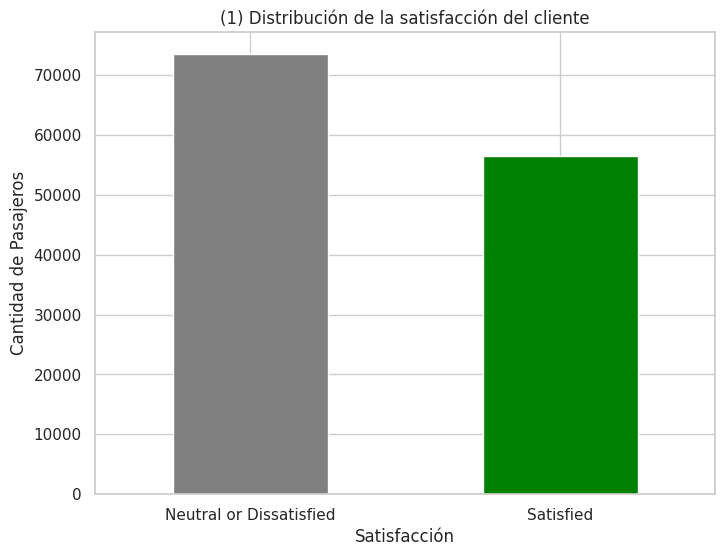

In [56]:
# Gráfico 1: Satisfacción del cliente
plt.figure(figsize=(8, 6))
plt.title("(1) Distribución de la satisfacción del cliente")
df["Satisfaction"].value_counts().plot(kind="bar", color=["gray", "green"])
plt.xlabel("Satisfacción")
plt.ylabel("Cantidad de Pasajeros")
plt.xticks(rotation=0)  # permite poner horizontal los nombres de las columnas
plt.show()

#### Grafico (1): Satisfacción del cliente
- Encontramos que hay más pasajeros que no están satisfechos con el servicio.

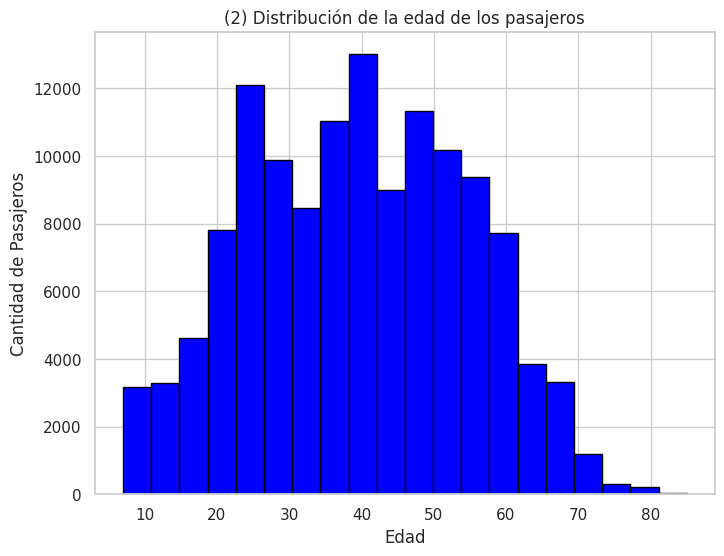

In [55]:
# Gráfico 2: Edad de los pasajeros
plt.figure(figsize=(8, 6))
plt.title("(2) Distribución de la edad de los pasajeros")
plt.hist(df["Age"], bins=20, color="blue", edgecolor="black")
plt.xlabel("Edad")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

#### Grafico (2): Edad ed los pasajeros
- En promedio nuestros pasajeros tienen 40 años, y la mayoría van de los 20 a los 60 años.


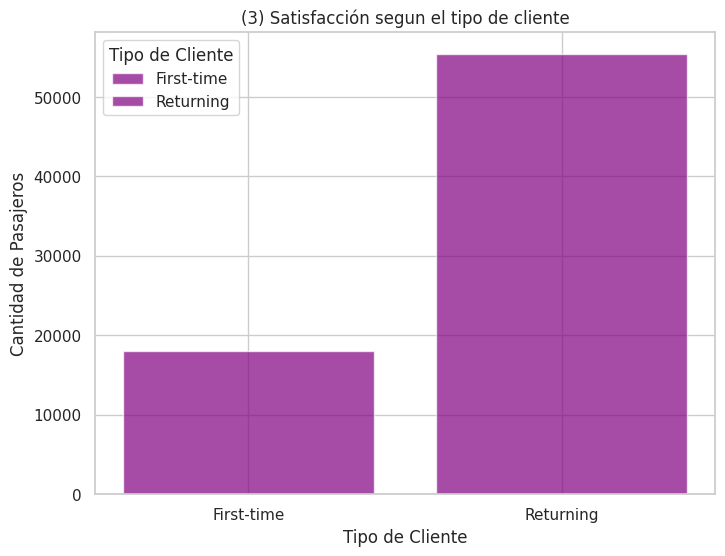

In [54]:
# Gráfico 3: Satisfacción según el tipo de cliente
plt.figure(figsize=(8, 6))
plt.title("(3) Satisfacción segun el tipo de cliente")
for customer_type in df["Customer Type"].unique():
    subset = df[df["Customer Type"] == customer_type]
    plt.bar(
        customer_type,
        subset["Satisfaction"].value_counts().max(),
        color="purple",
        alpha=0.7,
        label=customer_type,
    )
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Pasajeros")
plt.legend(title="Tipo de Cliente")
plt.show()


#### Grafico (3): Satisfacción segun tipo de cliente
- Los clientes recurrentes están mas satisfechos con el servicio que los que vuelan por primera vez.


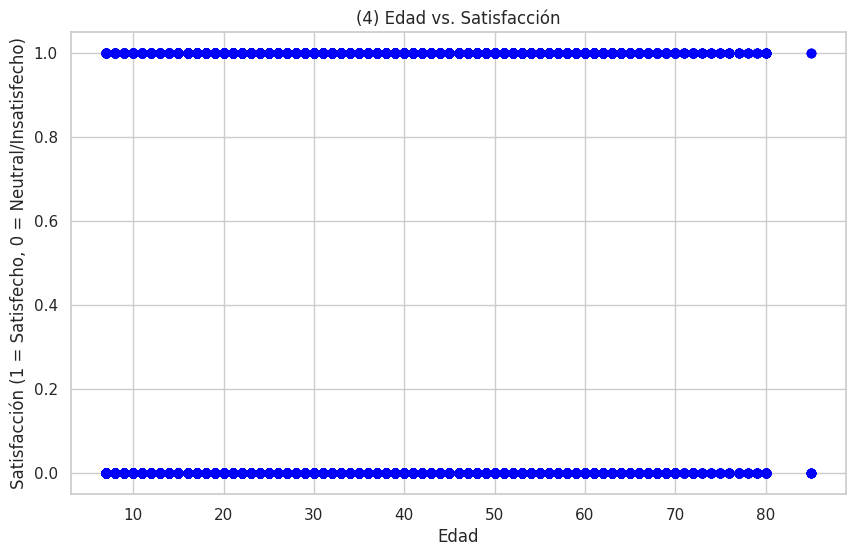

In [47]:
# Calculando subcojunto de datos basado en Satisfaction (Satisfied = 1, Neutral or Dissatisfied = 0)
df["Satisfaction_Num"] = df["Satisfaction"].apply(
    lambda x: 1 if x == "Satisfied" else 0
)

# Gráfico 4: Scatterplot de Edad vs. Satisfacción
plt.figure(figsize=(10, 6))
plt.title("(4) Edad vs. Satisfacción")
plt.scatter(df["Age"], df["Satisfaction_Num"], color="blue", alpha=0.5)
plt.xlabel("Edad")
plt.ylabel("Satisfacción (1 = Satisfecho, 0 = Neutral/Insatisfecho)")
plt.show()


#### Grafico 4: Edad vs Satisfacción
- No encontramos una correlación entre la edad y la satisfacción


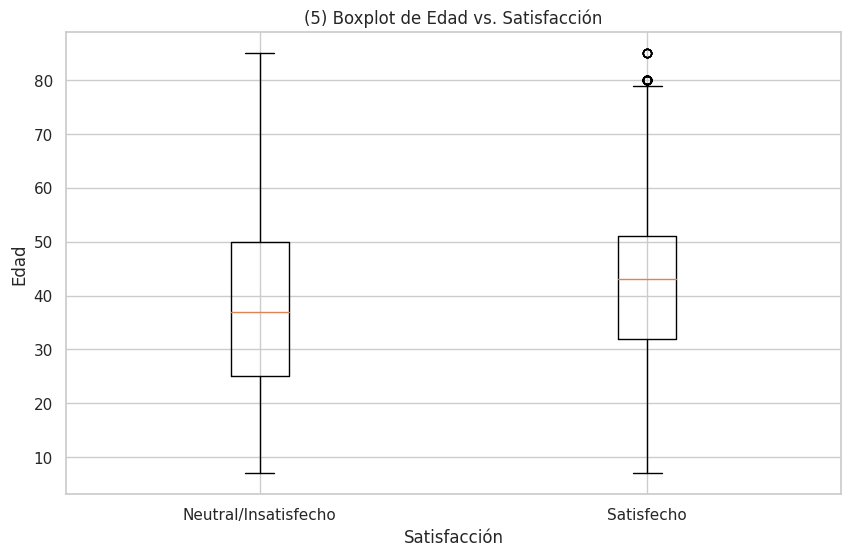

In [48]:
# Gráfico 5: Boxplot de Edad vs. Satisfacción
plt.figure(figsize=(10, 6))
plt.title("(5) Boxplot de Edad vs. Satisfacción")
plt.boxplot(
    [df[df["Satisfaction_Num"] == 0]["Age"], df[df["Satisfaction_Num"] == 1]["Age"]],
    labels=["Neutral/Insatisfecho", "Satisfecho"],
)
plt.xlabel("Satisfacción")
plt.ylabel("Edad")
plt.show()

#### Grafico (5): Edad vs Satisfacción (intento dos)
- No hay una diferencia marcada, en la edad que defina si hay una correlación entre la edad y la satisfacción del servicio.

---
### IV: Graficando con Seaborn

In [35]:
import seaborn as sns

In [36]:
# Cambiando el estilop visual de seaborn
sns.set_theme(style="whitegrid")

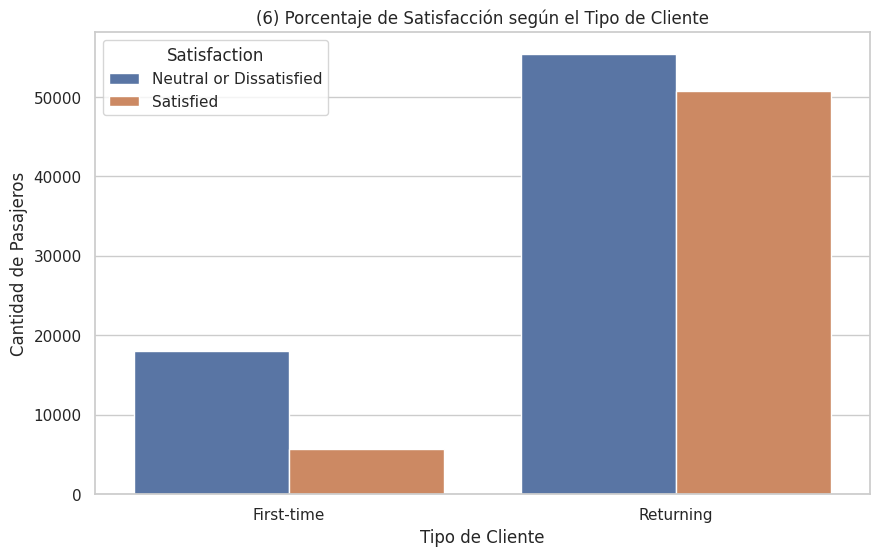

In [58]:
# Gráfico 6: Porcentaje de satisfacción según el tipo de cliente con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Customer Type", hue="Satisfaction")
plt.title("(6) Porcentaje de Satisfacción según el Tipo de Cliente")
plt.xlabel("Tipo de Cliente")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

#### Grafico 6: Satisfacción por tipo de cliente
- Confirmamos que hay más pasajeros inconformes, incluso en los que vuelan de forma recurrente.


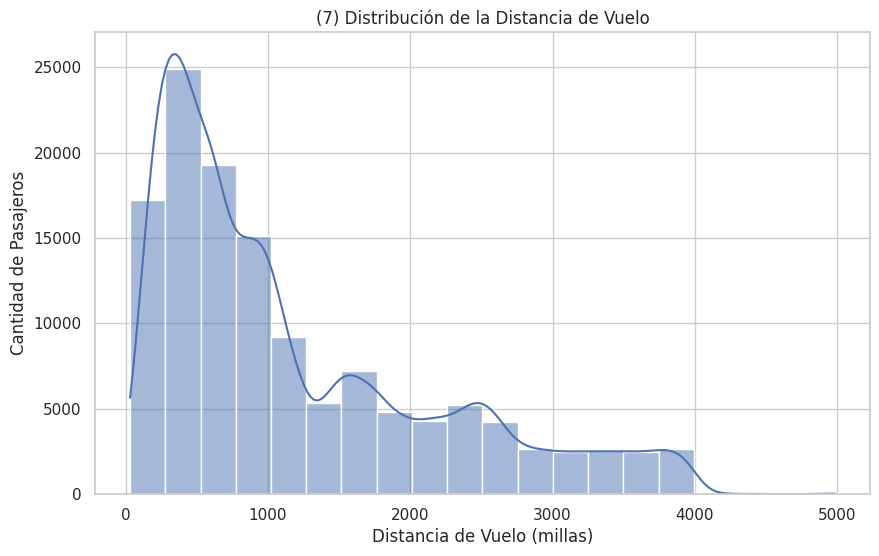

In [59]:
# Gráfico 7: Distribución de la distancia de vuelo con Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Flight Distance", bins=20, kde=True)
plt.title("(7) Distribución de la Distancia de Vuelo")
plt.xlabel("Distancia de Vuelo (millas)")
plt.ylabel("Cantidad de Pasajeros")
plt.show()

#### Grafico 7: Distancia de los vuelos
- Tenemos muchos mas vuelos cortos que largos.


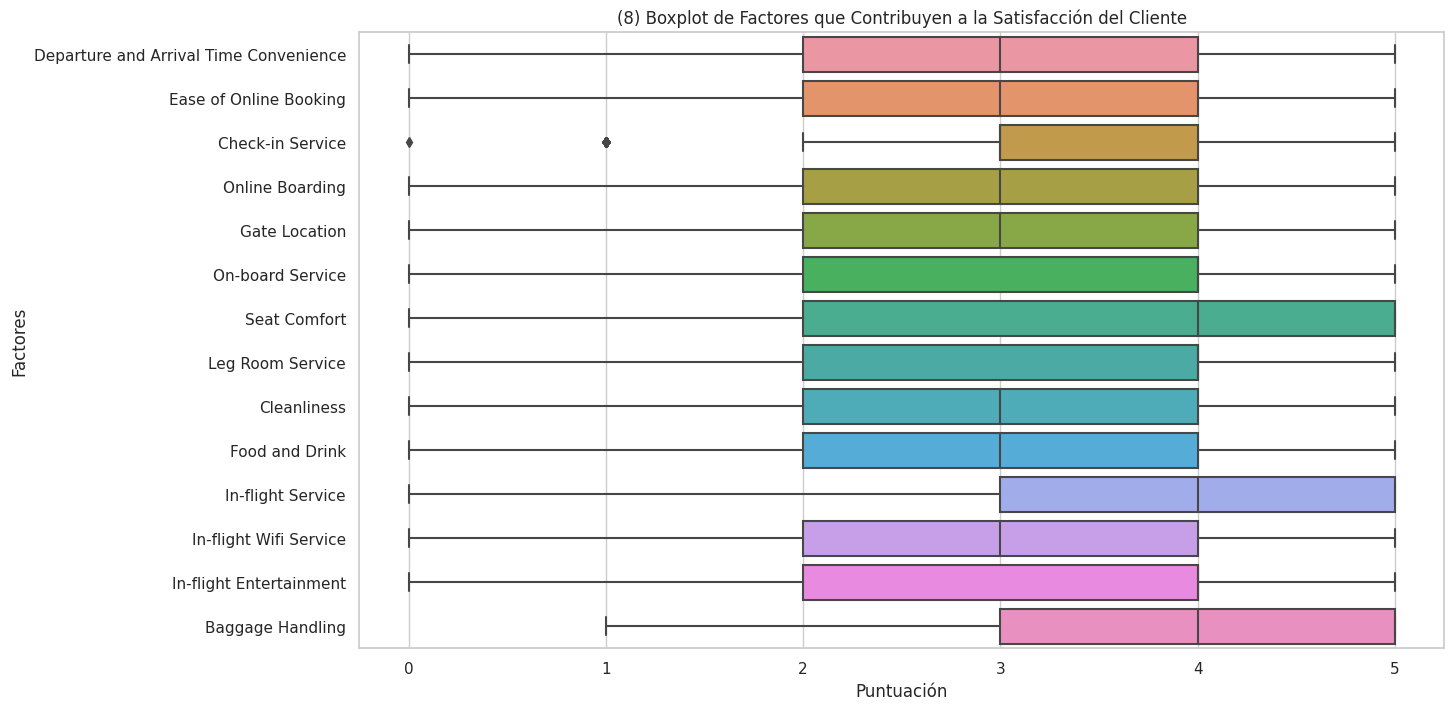

In [60]:
# Gráfico 8: Boxplot de factores que contribuyen a la satisfacción del cliente
plt.figure(figsize=(14, 8))
sns.boxplot(
    data=df.drop(
        [
            "Age",
            "Flight Distance",
            "Departure Delay",
            "Arrival Delay",
            "Satisfaction_Num",
        ],
        axis=1,
    ),
    orient="h",
)
plt.title("(8) Boxplot de Factores que Contribuyen a la Satisfacción del Cliente")
plt.xlabel("Puntuación")
plt.ylabel("Factores")
plt.show()

#### Grafico 8: Factores que contribuyen a la satisfacción del cliente
- Nuestro peor facor es el servicio de Check-in, y los mejores, los asientos confortables, el servicio durante el vuelo y el manejo del equipaje.

---
## V: Recomendaciones

- Dado que los clientes recurrentes son los que están mas satisfechos, podrían implementar un sistema de recompensas por lealtad lo que mejoría las puntuaciones de satisfacción.
- Como la mayoría de los vuelos son cortos, se podria poner mas emepeño en la limpieza abordo, y en snack mas variados para mejorar la puntuación.
- Claramente se debe observar lo que esta sucediendo el check-in para evitar malas puntuaciones de los clientes.